In [274]:
# For Analysis
import numpy as np
import pandas as pd

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For Calculations
from math import floor

## Importing and looking at the Data

Reading in the datasets

In [371]:
listings = pd.read_csv('../data/airbnb_listings.csv')
stations = pd.read_csv('../data/train_stations.csv')
neighbourhoods = pd.read_csv('../data/neighbourhood_score.csv')
attractions = pd.read_csv('../data/attractions.csv')

In [372]:
listings.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [373]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

There were no detailed descriptions given along with the dataset other than for id and log_price. Thus we need to do some EDA to identify the different features.
 We observe that, the following columns need to be changed to the correect data type.
- id to string
- first_review, host_since, last_review to date.
- instant_bookable, host_identity_verified, host_has_profie_pictore to Number encoded values.
- host_response_rate to a numerical column.

Some of the things to check
- Distributions of the variables
- Whether there are duplicates in the zip code
- Clusters in the data
- There are some facilities with the same names and same descriptions. 


In [374]:
# Check the statistical distribution for Numerical Columns
listings.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [375]:
# Check the distribution of Categorical and Text columns
listings.describe(include = ["O"])

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,74111,74111,74111,74111,74111,74111,74111,58247,73923,73923,55812,73923,74111,58284,74111,67239,65895,73145
unique,35,3,67122,5,5,6,73479,2554,2,2,80,3087,2,1371,73359,619,65883,769
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,Bunk bed in the Treat Street Clubhouse,Williamsburg,https://a0.muscache.com/im/pictures/70087089/b...,11211.0
freq,49003,41310,586,72028,32374,32349,8,293,73697,49748,43254,246,54660,1344,8,2862,3,1368


In [376]:
listings.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [377]:
lower_dim_categories = ['property_type', 'room_type', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
[listings[c].value_counts() for c in lower_dim_categories]

[Apartment             49003
 House                 16511
 Condominium            2658
 Townhouse              1692
 Loft                   1244
 Other                   607
 Guesthouse              498
 Bed & Breakfast         462
 Bungalow                366
 Villa                   179
 Dorm                    142
 Guest suite             123
 Camper/RV                94
 Timeshare                77
 Cabin                    72
 In-law                   71
 Hostel                   70
 Boutique hotel           69
 Boat                     65
 Serviced apartment       21
 Tent                     18
 Castle                   13
 Vacation home            11
 Yurt                      9
 Hut                       8
 Treehouse                 7
 Chalet                    6
 Earth House               4
 Tipi                      3
 Cave                      2
 Train                     2
 Island                    1
 Parking Space             1
 Casa particular           1
 Lighthouse   

In [378]:
def pp_fix_dtypes(df):
    #Correct the types of the data where required
    df = df.assign(
        id = str(id),
        first_review = pd.to_datetime(df.first_review),
        last_review = pd.to_datetime(df.last_review),
        host_since = pd.to_datetime(df.host_since)
    )
    return df
    

In [379]:
listings = pp_fix_dtypes(listings)

### Functions for handling Missing Values

In [380]:
def get_max_date(df):
    most_recent_date = max(
            max(df.host_since),
            max(df.first_review),
            max(df.last_review)
        )
    return most_recent_date

In [381]:
most_recent_date = get_max_date(listings)

In [382]:
listings.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [383]:
'''
first_review               15864
host_has_profile_pic         188
host_identity_verified       188
host_response_rate         18299
host_since                   188
last_review                15827
neighbourhood               6872
review_scores_rating       16722
thumbnail_url               8216
zipcode                      966
days_since_hosted            188
days_since_first_review    15864
days_since_last_review     15827
bedroom_share                 91
bathroom_share               200
'''

'\nfirst_review               15864\nhost_has_profile_pic         188\nhost_identity_verified       188\nhost_response_rate         18299\nhost_since                   188\nlast_review                15827\nneighbourhood               6872\nreview_scores_rating       16722\nthumbnail_url               8216\nzipcode                      966\ndays_since_hosted            188\ndays_since_first_review    15864\ndays_since_last_review     15827\nbedroom_share                 91\nbathroom_share               200\n'

In [384]:
listings[['host_since','first_review','last_review']].describe()

,host_since,first_review,last_review
count,73923,58247,58284
unique,3087,2554,1371
top,2015-03-30 00:00:00,2017-01-01 00:00:00,2017-04-30 00:00:00
freq,246,293,1344
first,2008-03-03 00:00:00,2008-11-17 00:00:00,2009-01-21 00:00:00
last,2017-10-04 00:00:00,2017-10-05 00:00:00,2017-10-05 00:00:00


In [385]:
# Listings where the first review date is before host_date
listings.dropna().loc[(listings.dropna().first_review < listings.dropna().host_since),['host_since','first_review','last_review']]

,host_since,first_review,last_review
163,2013-09-25,2013-08-01,2017-09-20
950,2013-12-13,2012-05-21,2017-09-09
3828,2012-02-05,2011-12-24,2017-03-22
5401,2012-08-27,2012-07-23,2017-04-30
7634,2012-03-04,2011-07-11,2017-09-19
8097,2015-10-15,2015-07-06,2017-04-27
8888,2013-11-20,2013-05-06,2016-12-25
11237,2013-11-20,2012-04-01,2017-04-03
12765,2013-10-06,2013-05-06,2016-09-14
16527,2012-09-18,2012-04-26,2017-04-05


**Notes for handling Missing Values**

host_since:
- Take the date of first_review where avilable.
- In some records, the date of first review is before the host_date. It is possible that 
    - the listing was changed at a later date - Update first_review date to host_date
    - the dates were read in the wrong order - Swap the first_review_date and host_date

In [386]:
def handle_missing(df):
    # Fill the Host Since column with the date of first review if available
    df.host_since = df.host_since.fillna(df.first_review)

#### Drop The Records with Missing Values

This needn't be done here. We can do this just before modelling using Impute in sklearn preprocessing if required. Currently put here for prototyping

In [387]:
# Store a copy of the original data 
listings_with_missing = listings.copy()

# Drop the Missing Values
listings.dropna(inplace = True)

In [388]:
listings.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

### Data Preprocessing

In [389]:
recode_features = True
create_dummies = True

In [392]:
# Function to Preprocess the Data
def preprocess(df, test_data = False):
    
    global recode_features, create_dummies, most_recent_date
    temp_df = df.copy()
    #Recode features where required
    if recode_features == True:
        temp_df = temp_df.replace(
            {
            'host_has_profile_pic': {'t': True, 'f': False},
            'host_identity_verified': {'t': True, 'f': False},
            'instant_bookable': {'t': True, 'f': False},
            'cancellation_policy': {'super_strict_30':'strict','super_strict_60':'strict'}
            }
        )
        recode_features = False
    
    # Create Dummies and Drop the original columns
    ## For room_type and city. 
    if create_dummies == True:
        temp_df = pd.concat([temp_df, pd.get_dummies(temp_df['room_type'])], axis=1)
        temp_df = pd.concat([temp_df, pd.get_dummies(temp_df['city'])], axis=1)
        create_dummies = False
    
    #Convert date fields into days_since and useful components
    ## Calculate the Maximum Date Present in the Data
    if test_data == False:
        most_recent_date = get_max_date(temp_df)
    print("Reference Date Used: ", most_recent_date)
    
    
    ## Derive the new columns
    temp_df = temp_df.assign(
        year_of_listing = temp_df.host_since.dt.year,
        month_of_listing = temp_df.host_since.dt.month,
        days_since_hosted = (most_recent_date - temp_df.host_since)/np.timedelta64(1, 'D'),
        days_since_first_review = (most_recent_date - temp_df.first_review)/np.timedelta64(1, 'D'),
        days_since_last_review = (most_recent_date - temp_df.last_review)/np.timedelta64(1, 'D')
    )
    
    # Calculate the bedroom and bathroom share per person. Higher the share, more the comfort.
    temp_df = temp_df.assign(
        bedroom_share = temp_df.bedrooms/temp_df.accommodates,
        bathroom_share = temp_df.bathrooms/temp_df.accommodates
    )
    
    # Drop the Features that are not needed
    temp_df.drop(['beds', 'bedrooms', 'bathrooms', 'room_type', 'city' ], axis = 1, inplace = True)
    
    df = temp_df
    print("Preprocessing Completed")
    
    return df

In [393]:
listings = preprocess(listings)

Reference Date Used:  2017-10-05 00:00:00
Preprocessing Completed


In [394]:
# Check the statistical distribution for Numerical Columns
listings.describe()

,log_price,accommodates,latitude,longitude,number_of_reviews,review_scores_rating,year_of_listing,month_of_listing,days_since_hosted,days_since_first_review,days_since_last_review,bedroom_share,bathroom_share
count,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000,38502.000000
mean,4.745546,3.233754,38.759075,-90.895232,32.975014,94.332217,2013.963742,6.529219,1204.232404,613.775025,125.901486,0.447071,0.486508
std,0.658015,2.137687,3.007696,21.446666,45.420254,6.876715,1.886244,3.305359,679.900394,521.528962,158.837235,0.263205,0.321180
min,0.000000,1.000000,33.705835,-122.511500,1.000000,20.000000,2008.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,4.304065,2.000000,34.185077,-118.326008,5.000000,92.000000,2013.000000,4.000000,659.000000,224.000000,18.000000,0.333333,0.250000
50%,4.700480,2.000000,40.682550,-74.001777,16.000000,96.000000,2014.000000,7.000000,1149.000000,467.000000,67.000000,0.500000,0.500000
75%,5.164786,4.000000,40.760402,-73.949291,42.000000,99.000000,2015.000000,9.000000,1691.000000,839.000000,172.000000,0.500000,0.500000
max,7.600402,16.000000,42.390437,-71.000462,542.000000,100.000000,2017.000000,12.000000,3503.000000,3180.000000,2637.000000,5.000000,8.000000


In [395]:
# Check the distribution of Categorical and Text columns
listings.describe(include = ["O"])

,id,property_type,amenities,bed_type,cancellation_policy,description,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,name,neighbourhood,thumbnail_url,zipcode
count,38502,38502,38502,38502,38502,38502,38502,38502,38502,38502,38502,38502,38502,38502
unique,1,31,36204,5,5,38193,2,2,76,2,38290,586,38496,653
top,<built-in function id>,Apartment,{},Real Bed,strict,Private room in the heart of Little Italy with...,t,t,100%,f,Spacious Private Room in Brooklyn,Williamsburg,https://a0.muscache.com/im/pictures/104667326/...,11221
freq,38502,24752,58,37405,19734,7,38445,27921,31082,26648,5,1523,2,727


In [396]:
listings.columns

Index(['id', 'log_price', 'property_type', 'amenities', 'accommodates',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'year_of_listing',
       'month_of_listing', 'days_since_hosted', 'days_since_first_review',
       'days_since_last_review', 'bedroom_share', 'bathroom_share'],
      dtype='object')

In [397]:
lower_dim_categories = ['property_type', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
[listings[c].value_counts() for c in lower_dim_categories]

[Apartment             24752
 House                  8903
 Condominium            1421
 Townhouse               940
 Loft                    719
 Guesthouse              335
 Other                   331
 Bed & Breakfast         286
 Bungalow                216
 Guest suite              97
 Dorm                     90
 Villa                    68
 In-law                   61
 Hostel                   46
 Cabin                    45
 Camper/RV                35
 Boat                     35
 Boutique hotel           32
 Timeshare                30
 Serviced apartment       12
 Castle                   10
 Tent                      8
 Vacation home             5
 Hut                       4
 Yurt                      4
 Chalet                    4
 Treehouse                 4
 Tipi                      3
 Earth House               3
 Cave                      2
 Train                     1
 Name: property_type, dtype: int64, Real Bed         37405
 Futon              434
 Pull-out Sofa    

In [398]:
listings.head()

,id,log_price,property_type,amenities,accommodates,bed_type,cancellation_policy,cleaning_fee,description,first_review,...,review_scores_rating,thumbnail_url,zipcode,year_of_listing,month_of_listing,days_since_hosted,days_since_first_review,days_since_last_review,bedroom_share,bathroom_share
1,<built-in function id>,5.129899,Apartment,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,Real Bed,strict,True,Enjoy travelling during your stay in Manhattan...,2017-08-05,...,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,2017,6,108.0,61.0,12.0,0.428571,0.142857
2,<built-in function id>,4.976734,Apartment,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,Real Bed,moderate,True,The Oasis comes complete with a full backyard ...,2017-04-30,...,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,2016,10,345.0,158.0,21.0,0.200000,0.200000
5,<built-in function id>,4.442651,Apartment,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,Real Bed,strict,True,Beautiful private room overlooking scenic view...,2017-08-27,...,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,2017,6,120.0,39.0,30.0,0.500000,0.500000
7,<built-in function id>,4.787492,Condominium,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,Real Bed,moderate,True,Arguably the best location (and safest) in dow...,2016-12-16,...,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,2013,5,1601.0,293.0,176.0,0.500000,0.500000
8,<built-in function id>,4.787492,House,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,Real Bed,moderate,True,Garden Studio with private entrance from the s...,2016-02-13,...,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,2015,6,854.0,600.0,11.0,0.500000,0.500000


### Visualization of target variables

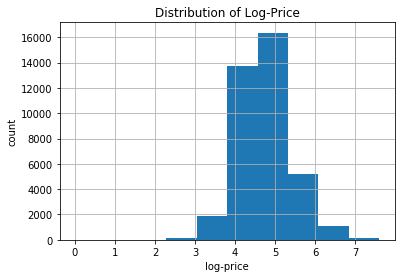

In [399]:
# The Log Price column
plot = listings.log_price.hist()
plt.title('Distribution of Log-Price')
plt.xlabel('log-price')
plt.ylabel('count')
plt.show()

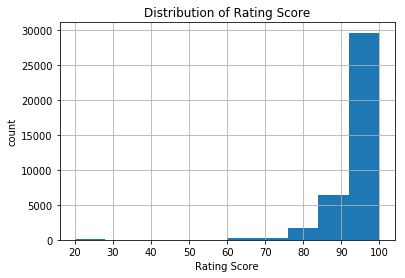

In [400]:
# The review score column
listings.review_scores_rating.hist()
plt.title('Distribution of Rating Score')
plt.xlabel('Rating Score')
plt.ylabel('count')
plt.show()

In [401]:
listings.columns

Index(['id', 'log_price', 'property_type', 'amenities', 'accommodates',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'year_of_listing',
       'month_of_listing', 'days_since_hosted', 'days_since_first_review',
       'days_since_last_review', 'bedroom_share', 'bathroom_share'],
      dtype='object')

In [402]:
categorical_cols = []
numerical_cols = ['log_price', 'accommodates', 'number_of_reviews', 
                  'review_scores_rating', 'days_since_hosted', 'days_since_first_review',
                 'days_since_last_review', 'bedroom_share', 'bathroom_share']
text_cols = []


In [403]:
listings.loc[:,numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38502 entries, 1 to 74110
Data columns (total 9 columns):
log_price                  38502 non-null float64
accommodates               38502 non-null int64
number_of_reviews          38502 non-null int64
review_scores_rating       38502 non-null float64
days_since_hosted          38502 non-null float64
days_since_first_review    38502 non-null float64
days_since_last_review     38502 non-null float64
bedroom_share              38502 non-null float64
bathroom_share             38502 non-null float64
dtypes: float64(7), int64(2)
memory usage: 2.9 MB


### Modelling

In [404]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [405]:
listings.columns

Index(['id', 'log_price', 'property_type', 'amenities', 'accommodates',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'year_of_listing',
       'month_of_listing', 'days_since_hosted', 'days_since_first_review',
       'days_since_last_review', 'bedroom_share', 'bathroom_share'],
      dtype='object')

In [406]:
np.random.seed(2018)
train = np.random.choice([True, False], listings.shape[0], replace=True, p=[0.5, 0.5])
listings_train = listings.iloc[train,:]
listings_test = listings.iloc[~train,:]


In [407]:
train_cols = ['accommodates', 'bedroom_share', 'bathroom_share', 'year_of_listing']
target_col = ['log_price']

x_train = listings_train[train_cols].values
x_test = listings_test[train_cols].values
y_train = listings_train[target_col].values
y_test = listings_test[target_col].values

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(19347, 4) (19155, 4) (19347, 1) (19155, 1)


### Linear Regression Model

In [408]:
# Declare an instance of the Linear Regression model.
lm = LinearRegression()

# Fit the model on to the training data( Train the model ).
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [409]:
# Check the R^2 value of the model.
print("R^2 value using score fn: %.3f" % lm.score(x_test,y_test))

R^2 value using score fn: 0.356


In [410]:
# Use the model to predict values
y_pred = lm.predict(x_test)

In [411]:
# Calculate the Mean Squared Error using the mean_squared_error function.
mean_squared_error(y_test,y_pred)


0.28074879732286895

In [412]:
print(lm.intercept_, lm.coef_)

[70.03050187] [[ 0.16035588 -0.10223416 -0.22010233 -0.03259739]]


In [413]:
y_pred.shape

(19155, 1)

Text(0.5,1,'Residuals for the model')

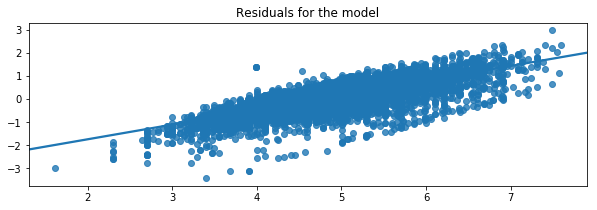

In [414]:
# Plot of Casual and Registered model's residuals:
fig = plt.figure(figsize=(10,3))

sns.regplot(y_test[:,0],y_test[:,0] - y_pred[:,0])
plt.title("Residuals for the model")
